In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import pandas as pd

inpPath = "/Users/chantalstefan/Documents/Scripting/Data Analytics Portfolio für Git/"

DiabetesDf = pd.read_csv(inpPath + "Healthcare-Diabetes.csv", delimiter=",", header=0, index_col=0)

print(DiabetesDf)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                        
1               6      148             72             35        0  33.6   
2               1       85             66             29        0  26.6   
3               8      183             64              0        0  23.3   
4               1       89             66             23       94  28.1   
5               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2764            2       75             64             24       55  29.7   
2765            8      179             72             42      130  32.7   
2766            6       85             78              0        0  31.2   
2767            0      129            110             46      130  67.1   
2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFu

In [13]:
# Get a summary of the dataframe
print(DiabetesDf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 1 to 2768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB
None


In [14]:
# Check for missing values
print(DiabetesDf.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
# Statistical summary to identify potential outliers
print(round(DiabetesDf.describe()),2)

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       2768.0   2768.0         2768.0         2768.0   2768.0  2768.0   
mean           4.0    121.0           69.0           21.0     80.0    32.0   
std            3.0     32.0           19.0           16.0    112.0     8.0   
min            0.0      0.0            0.0            0.0      0.0     0.0   
25%            1.0     99.0           62.0            0.0      0.0    27.0   
50%            3.0    117.0           72.0           23.0     37.0    32.0   
75%            6.0    141.0           80.0           32.0    130.0    37.0   
max           17.0    199.0          122.0          110.0    846.0    81.0   

       DiabetesPedigreeFunction     Age  Outcome  
count                    2768.0  2768.0   2768.0  
mean                        0.0    33.0      0.0  
std                         0.0    12.0      0.0  
min                         0.0    21.0      0.0  
25%                         0.0    24.0   

In [16]:
# The Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns have minimum values of 0, which may not be plausible in a real-world scenario and could indicate missing or incorrect data

In [17]:
# Handling zero values: replacing zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI by imputing the median of the respective columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [18]:
for column in columns_with_zeros:
    median_value = DiabetesDf[column].median()  # Compute median excluding zeros
    DiabetesDf[column] = DiabetesDf[column].mask(DiabetesDf[column] == 0, median_value)

In [19]:
print(round(DiabetesDf.describe()),2)

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       2768.0   2768.0         2768.0         2768.0   2768.0  2768.0   
mean           4.0    122.0           72.0           27.0     98.0    33.0   
std            3.0     31.0           12.0            9.0    101.0     7.0   
min            0.0     44.0           24.0            7.0     14.0    18.0   
25%            1.0     99.0           64.0           23.0     37.0    28.0   
50%            3.0    117.0           72.0           23.0     37.0    32.0   
75%            6.0    141.0           80.0           32.0    130.0    37.0   
max           17.0    199.0          122.0          110.0    846.0    81.0   

       DiabetesPedigreeFunction     Age  Outcome  
count                    2768.0  2768.0   2768.0  
mean                        0.0    33.0      0.0  
std                         0.0    12.0      0.0  
min                         0.0    21.0      0.0  
25%                         0.0    24.0   

In [20]:
import seaborn as sns

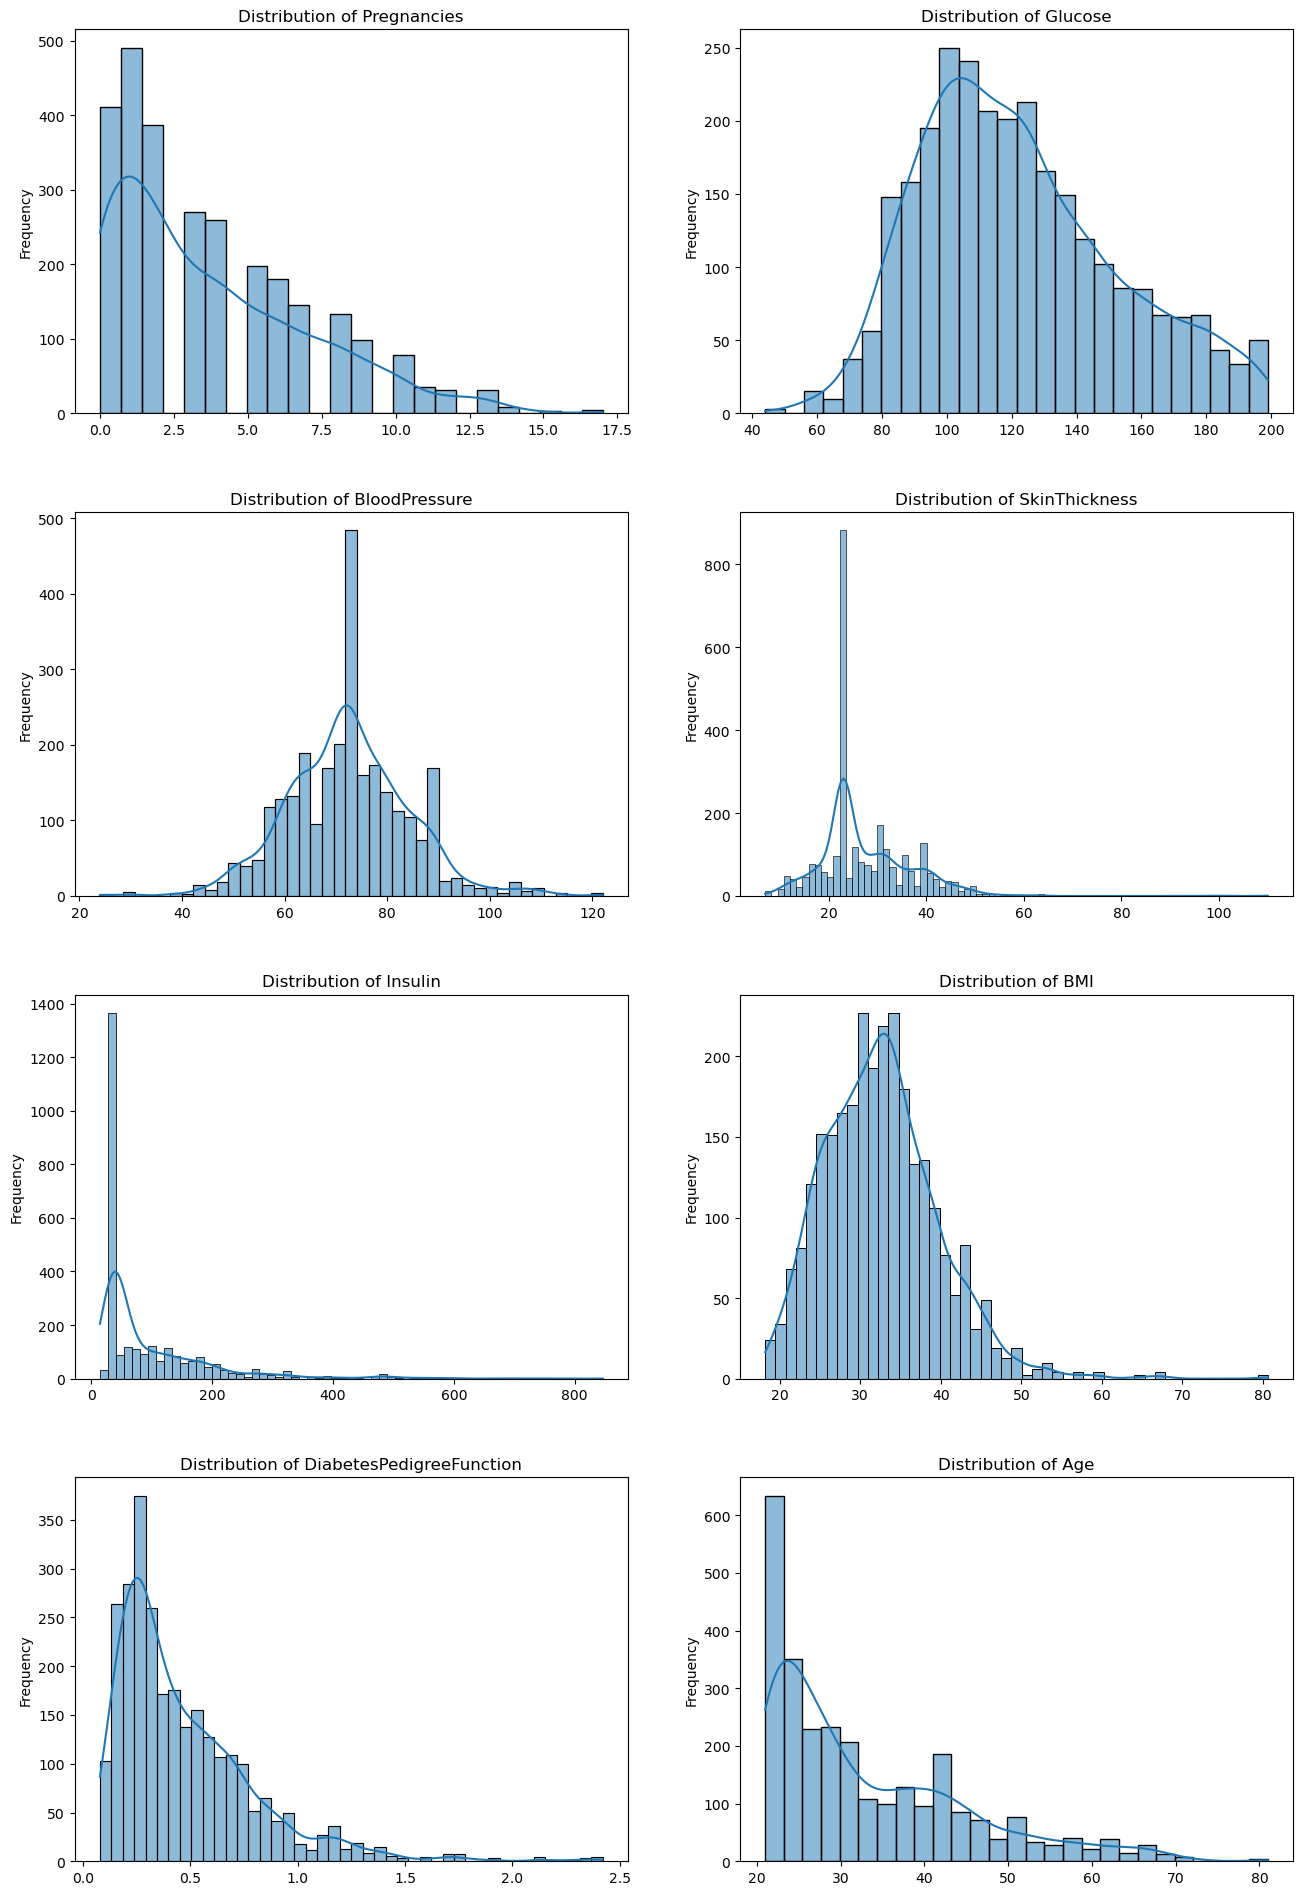

In [21]:
# Distribution of features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.tight_layout(pad=5.0)

for i, ax in enumerate(axes.flatten()):
    sns.histplot(DiabetesDf[features[i]].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {features[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

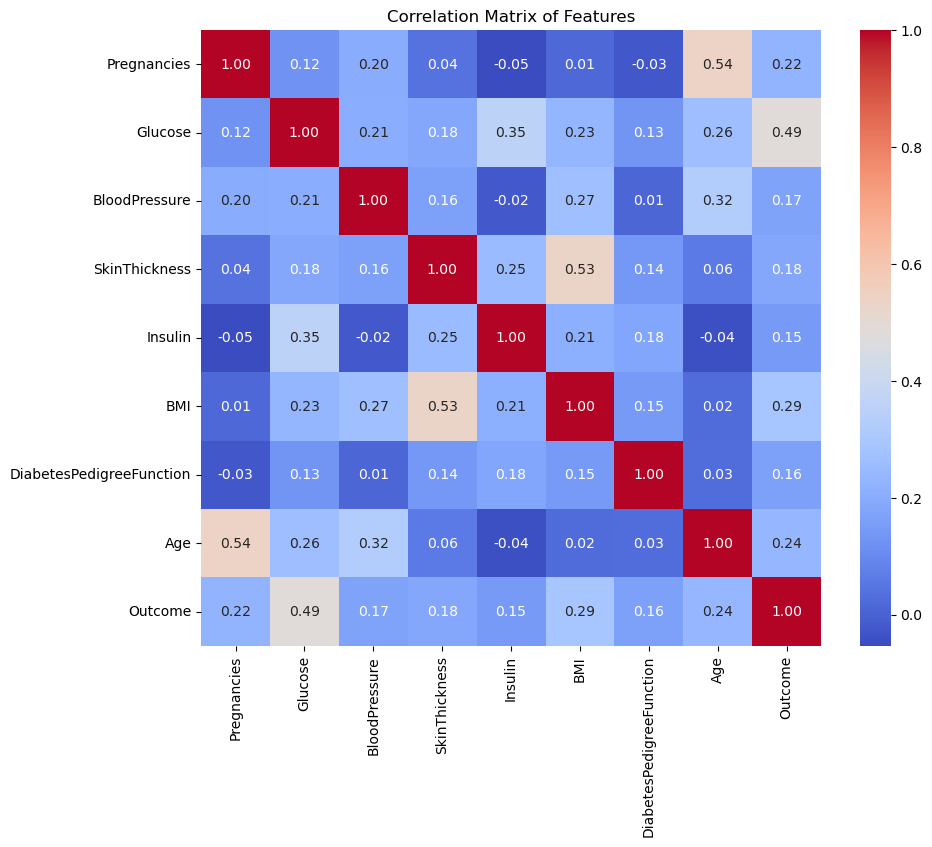

In [22]:
# Analyizing relationships between the feature with a correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = DiabetesDf.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')

plt.show()

In [23]:
# Since deep learning models perform better with normalized data, the data will be normalized to the numerical features

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Separating features and target feature
X = DiabetesDf.drop('Outcome', axis=1)
y = DiabetesDf['Outcome']

In [26]:
# Applying standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Feedforward neural network will be used as it is suitable for binary classification tasks
# The model will have an input layer, a couple of hidden layers, and an output layer with a sigmoid activation function helping with the binary classification
import tensorflow as tf

In [30]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary to see the structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
56/56 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7154 - val_loss: 0.4937 - val_accuracy: 0.7562
Epoch 2/50
56/56 [==============================] - 0s 807us/step - loss: 0.4548 - accuracy: 0.7820 - val_loss: 0.4644 - val_accuracy: 0.7607
Epoch 3/50
56/56 [==============================] - 0s 797us/step - loss: 0.4510 - accuracy: 0.7719 - val_loss: 0.4529 - val_accuracy: 0.7720
Epoch 4/50
56/56 [==============================] - 0s 812us/step - loss: 0.4315 - accuracy: 0.7837 - val_loss: 0.4492 - val_accuracy: 0.7810
Epoch 5/50
56/56 [==============================] - 0s 824us/step - loss: 0.4275 - accuracy: 0.7894 - val_loss: 0.4482 - val_accuracy: 0.7652
Epoch 6/50
56/56 [==============================] - 0s 813us/step - loss: 0.4201 - accuracy: 0.7911 - val_loss: 0.4448 - val_accuracy: 0.7630
Epoch 7/50
56/56 [==============================] - 0s 794us/step - loss: 0.4139 - accuracy: 0.7950 - val_loss: 0.4343 - val_accuracy: 0.7720
Epoch 8/

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

18/18 [==============================] - 0s 763us/step - loss: 0.3079 - accuracy: 0.8682
Test accuracy: 0.8682310581207275


In [35]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [36]:
# Function to calculate permutation feature importance
def permutation_feature_importance(model, X_test, y_test):
    baseline_accuracy = accuracy_score(y_test, model.predict(X_test).round())
    feature_importances = []
    for i in range(X_test.shape[1]):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[:, i] = shuffle(X_test_shuffled[:, i])
        shuffled_accuracy = accuracy_score(y_test, model.predict(X_test_shuffled).round())
        importance = baseline_accuracy - shuffled_accuracy
        feature_importances.append(importance)
    return feature_importances

# Calculate and print feature importances
feature_importances = permutation_feature_importance(model, X_test, y_test)
print(feature_importances)

18/18 [==============================] - 0s 352us/step
[0.07581227436823101, 0.1859205776173285, 0.054151624548736454, 0.05054151624548742, 0.04873646209386284, 0.06859205776173283, 0.06317689530685922, 0.09747292418772568]
